In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR #This is the autogression model we know from previous iteration
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Setting up Data Frames for the project!

In [105]:
df = pd.read_csv('../../csv/Combined_Data_Frame.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# df = pd.read_csv('../../csv/demand_2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = df.sort_values('Record Date')
df = df.interpolate()
df = df.drop(['Air Temperature(Apparent)', 'Cloud Coverage'], axis=1) 
df = df[1:]
df

,Total Demand,Wind Speed,Air Temperature
Record Date,,,
2018-01-02,61336.0,22.65,6.10
2018-01-03,62174.0,28.72,9.03
2018-01-04,62063.0,22.69,9.87
2018-01-05,61359.0,20.38,8.30
2018-01-06,58766.0,16.29,5.91
...,...,...,...
2021-12-27,57385.0,26.79,7.90
2021-12-28,56398.0,21.86,9.53
2021-12-29,54512.0,18.87,10.82


In [106]:
# Setting the prediction period
period = 29

### Auto corelation checking 

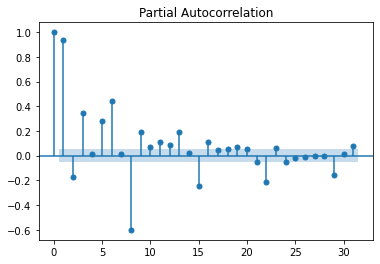

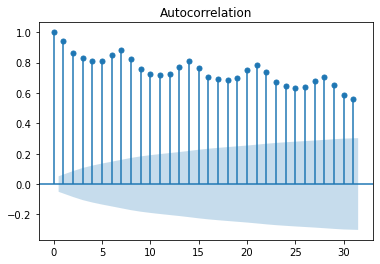

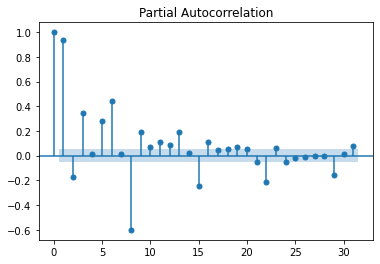

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cr = df.copy()
cr = cr.drop(['Wind Speed', 'Air Temperature'], axis=1)


plot_acf(cr, lags=31)
plot_pacf(cr, lags=31)

### Original Model

In [108]:
# X = cr.values #I'm using the second example data here (airline passengers)
# train, test = X[1:len(X)-period], X[len(X)-period:] #we predict for ony 30 days for example

# # train autoregression
# model = AR(train)
# model_fit = model.fit()

# # print('Lag: %s' % model_fit.k_ar) #here we can access the perfect lag to use when we want to finetune other versions of our model
# # print('Coefficients: %s' % model_fit.params) #here we access the coefficients computed per lag (shift of our time window)

# # make predictions
# predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# # plot results
# plt.figure(figsize=(10, 5))
# plt.title("1st Generation: Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

# plt.plot(test, color='blue', label='Demand Test')
# plt.plot(predictions, color='red', label = 'Demand Prediction')

# plt.ylabel("Electricity Demand | MW")
# plt.xlabel("Time Period | Day")

# plt.legend()
# plt.show()

# mae = mean_absolute_error(test, predictions)
# print('MAE: %.3f' % mae)

# rmse = mean_squared_error(test, predictions, squared=False)
# print('RMSE: %.3f' % rmse)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(test, predictions) * 100
# print('MAPE: %.3f' % mape)

### Creating model with lags

In [109]:
# from statsmodels.tsa.ar_model import ar_select_order #we can use this function to select the lags with the most autocorrelation
# from statsmodels.tsa.ar_model import AutoReg #The AutoReg(ression) model is the updated version of the AR model. The mathematical concept is the same, there's just more parameters we can finetune to make the model fit our data better.
# from sklearn.metrics import mean_absolute_percentage_error

# lags = ar_select_order(train, maxlag=31, seasonal=True, period=12)
# # print(lags.ar_lags)

# auto = AutoReg(train, lags=lags.ar_lags, trend="ct", seasonal=True, period=12).fit() #use the lag data we've selected as the ideal lags above, trend indicates whether to look at the trend too or only the constant values (or both)
# predictions = auto.predict(start=len(train), end=len(train)+len(test)-1)
# # for i in range(len(predictions)):
# #     print('predicted=%f, actual=%f' % (predictions[i], test[i]))
    

# plt.figure(figsize=(10, 5))
# plt.title("1st Generation + LAGS : Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

# plt.plot(test, color='blue', label='Demand Test')
# plt.plot(predictions, color='red', label = 'Demand Prediction')

# plt.ylabel("Electricity Demand | MW")
# plt.xlabel("Time Period | Day")

# plt.legend()
# plt.show()


# mae = mean_absolute_error(test, predictions)
# print('MAE: %.3f' % mae)
# rmse = mean_squared_error(test, predictions, squared=False)
# print('RMSE: %.3f' % rmse)

# # mape = mean_absolute_percentage_error(test, predictions)
# # print('MAPE: %.3f' % mape)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(test, predictions) * 100
# print('MAPE: %.3f' % mape)

### 3rd Generation AR model with the EXO variables

In [110]:
df2 = pd.read_csv('../../csv/Combined_Data_Frame.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# df2 = pd.read_csv('../../csv/demand_2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = df2.sort_values('Record Date')
df2 = df2.interpolate() 
df2 = df2[1:]
df2

,Total Demand,Wind Speed,Air Temperature(Apparent),Air Temperature,Cloud Coverage
Record Date,,,,,
2018-01-02,61336.0,22.65,15.35,6.10,78.58
2018-01-03,62174.0,28.72,20.15,9.03,93.00
2018-01-04,62063.0,22.69,19.00,9.87,92.93
2018-01-05,61359.0,20.38,18.35,8.30,84.29
2018-01-06,58766.0,16.29,15.82,5.91,89.51
...,...,...,...,...,...
2021-12-27,57385.0,26.79,16.47,7.90,90.19
2021-12-28,56398.0,21.86,16.37,9.53,93.61
2021-12-29,54512.0,18.87,20.07,10.82,97.43


In [111]:
X = df2['Total Demand'].values 
train, test = X[1:len(X)-period], X[len(X)-period:]

# w = df2['Wind Speed'].values
# w_train, w_test = w[1:len(w)-period], w[len(w)-period:]

a = df2['Air Temperature'].values
a_train, a_test = a[1:len(a)-period], a[len(a)-period:] 

# ap = df2['Air Temperature(Apparent)'].values
# ap_train, ap_test = ap[1:len(ap)-period], ap[len(ap)-period:] 

c = df2['Cloud Coverage'].values
c_train, c_test = c[1:len(c)-period], c[len(c)-period:] 

array_train = np.array([a_train,])
array_test = np.array([a_test])

array_train = array_train.reshape((1429,  1)) 
array_test = array_test.reshape((period, 1))

### Checking if everything works before adding the EXO

In [112]:
# from statsmodels.tsa.ar_model import AR

# # train 
# model = AR(train)
# model_fit = model.fit()

# # make predictions
# predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# # for i in range(len(predictions)):
# #     print('predicted=%f, actual=%f' % (predictions[i], test[i]))

# # plot results
# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

# rmse = mean_squared_error(test, predictions, squared=False)
# print('Test RMSE: %.3f' % rmse)

# mae = mean_absolute_error(test, predictions)
# print('MAE: %.3f' % mae)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(test, predictions) * 100
# print('MAPE: %.3f' % mape)

### EXO Model

In [113]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

lags = ar_select_order(train, maxlag=30, seasonal=False, period=12)

auto = AutoReg(train, lags=lags.ar_lags, trend="t", seasonal=True, exog=array_train, period=12).fit()
predictions = auto.predict(start=len(train), end=len(train)+len(test)-1, exog_oos=array_test)


/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


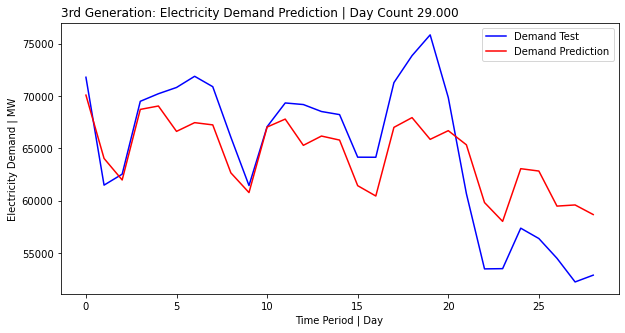

MAE of the model is: 3750.136


In [114]:
plt.figure(figsize=(10, 5))
plt.title("3rd Generation: Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions, color='red', label = 'Demand Prediction')


plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

mae = mean_absolute_error(test, predictions)
print('MAE of the model is: %.3f' % mae)

# rmse = mean_squared_error(test, predictions, squared=False)
# print('RMSE: %.3f' % rmse)

# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(test, predictions) * 100
# print('MAPE: %.3f' % mape)